# <center>Garmener Case Study</center>
## <center>Risk Analytics In Banking & Financial Services</center>

### Goal
#### Identify  loan defaulter driving factor to manage risk.

<ul>
<li>Load and Cleanup Data</li>
<li>Analyze Data</li>
<li>Identify Defaulter Data Pattern using Univariant or Bivariant analysis</li>
<li>Pin point Driving Factor behind loan defaulter</li>
</ul>

**Load Libraries**

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Load Customer Loan Profile Data**

In [65]:
dfCust = pd.read_csv('DataSet/loan.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [66]:
pd.set_option('display.max.column',111)

In [67]:
dfCust.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade                 emp_title emp_length  \
0   10.65%       162.87     B        B2                       NaN  10+ years   
1   15.27%        59.83     C        C4                     Ryder   < 1 year   
2   15.96%        84.33     C        C5                       NaN  10+ years   
3   13.49%       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4   12.69%        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-11   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-11  Charged Off   
2           RENT     12252.0        Not Verified  Dec-11   Fully Paid   
3           RENT     49200.0     Source Verified  Dec-11   Fully Paid   
4           RENT     80000.0     Source Verified  Dec-11      Current   

  pymnt_plan                                                url  \
0          n  https://lendingclub.com/browse/loanDetail.acti...   
1          n  https://lendingclub.com/browse/loanDetail.acti...   
2          n  https://lendingclub.com/browse/loanDetail.acti...   
3          n  https://lendingclub.com/browse/loanDetail.acti...   
4          n  https://lendingclub.com/browse/loanDetail.acti...   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state    dti  delinq_2yrs  \
0              Computer    860xx         AZ  27.65            0   
1                  bike    309xx         GA   1.00            0   
2  real estate business    606xx         IL   8.72            0   
3              personel    917xx         CA  20.00            0   
4              Personal    972xx         OR  17.94            0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0           Jan-85               1                     NaN   
1           Apr-99               5                     NaN   
2           Nov-01               2                     NaN   
3           Feb-96               1                    35.0   
4           Jan-96               0                    38.0   

   mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  total_acc  \
0                     NaN         3        0      13648     83.70%          9   
1                     NaN         3        0       1687      9.40%          4   
2                     NaN         2        0       2956     98.50%         10   
3                     NaN        10        0       5598        21%         37   
4                     NaN        15        0      27783     53.90%         38   

  initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
0                   f       0.00           0.00   5863.155187   
1                   f       0.00           0.00   1008.710000   
2                   f       0.00           0.00   3005.666844   
3                   f       0.00           0.00  12231.890000   
4                   f     524.06         524.06   3513.330000   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0          5833.84          5000.00         863.16     

In [68]:
missingValue = dfCust.isnull().sum() / dfCust.index.size * 100

In [69]:
print('100 % Missing Data Count : ', missingValue[missingValue == 100].size)
print('More than 20 % Missing Data Count : ', missingValue[missingValue >= 20].size)

100 % Missing Data Count :  54
More than 20 % Missing Data Count :  58


In [70]:
missingValue[missingValue >= 20]

desc                               32.580507
mths_since_last_delinq             64.662487
mths_since_last_record             92.985372
next_pymnt_d                       97.129693
mths_since_last_major_derog       100.000000
annual_inc_joint                  100.000000
dti_joint                         100.000000
verification_status_joint         100.000000
tot_coll_amt                      100.000000
tot_cur_bal                       100.000000
open_acc_6m                       100.000000
open_il_6m                        100.000000
open_il_12m                       100.000000
open_il_24m                       100.000000
mths_since_rcnt_il                100.000000
total_bal_il                      100.000000
il_util                           100.000000
open_rv_12m                       100.000000
open_rv_24m                       100.000000
max_bal_bc                        100.000000
all_util                          100.000000
total_rev_hi_lim                  100.000000
inq_fi    

Will drop column having more than 20% of missing data.<BR>
Analyze other column and take decision of usefullness of column.

In [71]:
dfCust.drop(columns= missingValue[missingValue>= 20].index, inplace=True)

In [72]:
dfCust.shape

(39717, 53)

In [73]:
missingValue = dfCust.isnull().sum() / dfCust.index.size * 100

In [74]:
print('More than 20 % Missing Data Count : ', missingValue[missingValue >= 20].size)

More than 20 % Missing Data Count :  0


In [75]:
missingValue

id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_title                     6.191303
emp_length                    2.706650
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
pymnt_plan                    0.000000
url                           0.000000
purpose                       0.000000
title                         0.027696
zip_code                      0.000000
addr_state                    0.000000
dti                           0.000000
delinq_2yrs                   0.000000
earliest_cr_line         

In [76]:
missingRowValue = dfCust.isnull().sum(axis=1) / dfCust.columns.size* 100

In [77]:
missingRowValue [missingRowValue > 9]

39659    9.433962
39660    9.433962
39700    9.433962
39704    9.433962
39706    9.433962
39714    9.433962
39715    9.433962
dtype: float64

In [78]:
dfCust.iloc[missingRowValue [missingRowValue > 9].index]

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
39659  121568     121574       4000         4000           1925.0   36 months   
39660  121535     121373       2800         2800           1625.0   36 months   
39700   98276      98268       5400         5400            200.0   36 months   
39704   93277      93254       3000         3000            950.0   36 months   
39706   92676      92671       5000         5000            150.0   36 months   
39714   90395      90390       5000         5000           1325.0   36 months   
39715   90376      89243       5000         5000            650.0   36 months   

      int_rate  installment grade sub_grade emp_title emp_length  \
39659    9.64%       128.41     B        B4       NaN   < 1 year   
39660    8.70%        88.65     B        B1       NaN   < 1 year   
39700    7.75%       168.60     A        A3       NaN   < 1 year   
39704    8.70%        94.98     B        B1       NaN   < 1 year   
39706    8.07%       156.84     A        A4       NaN   < 1 year   
39714    8.07%       156.84     A        A4       NaN   < 1 year   
39715    7.43%       155.38     A        A2       NaN   < 1 year   

      home_ownership  annual_inc verification_status issue_d loan_status  \
39659           NONE    100000.0        Not Verified  Aug-07  Fully Paid   
39660           NONE    120000.0        Not Verified  Aug-07  Fully Paid   
39700           RENT      8000.0        Not Verified  Jul-07  Fully Paid   
39704       MORTGAGE     25000.0        Not Verified  Jul-07  Fully Paid   
39706       MORTGAGE    180000.0        Not Verified  Jul-07  Fully Paid   
39714       MORTGAGE    100000.0        Not Verified  Jul-07  Fully Paid   
39715       MORTGAGE    200000.0        Not Verified  Jul-07  Fully Paid   

      pymnt_plan                                                url  \
39659          n  https://lendingclub.com/browse/loanDetail.acti...   
39660          n  https://lendingclub.com/browse/loanDetail.acti...   
39700          n  https://lendingclub.com/browse/loanDetail.acti...   
39704          n  https://lendingclub.com/browse/loanDetail.acti...   
39706          n  https://lendingclub.com/browse/loanDetail.acti...   
39714          n  https://lendingclub.com/browse/loanDetail.acti...   
39715          n  https://lendingclub.com/browse/loanDetail.acti...   

                  purpose                           title zip_code addr_state  \
39659               other  Refinancing high interest loan    950xx         CA   
39660               other                  Baby is coming    024xx         MA   
39700         educational      Help with college expenses    306xx         GA   
39704      small_business               Home Based Bakery    017xx         MA   
39706    home_improvement            remodelin my kitchen    530xx         WI   
39714  debt_consolidation          MBA Loan Consolidation    017xx         MA   
39715               other                        JAL Loan    208xx         MD   

         dti  delinq_2yrs earliest_cr_line  inq_last_6mths  open_acc  pub_rec  \
39659  15.00            0           May-99               1         6        0   
39660  15.00            0           May-99               1         6        0   
39700   3.00            0           Mar-89               0         4        0   
39704  14.54            0           Sep-00               1        10        0   
39706   5.55            0           Jun-96               0        12        0   
39714   2.30            0           Oct-98               0        11        0   
39715   3.72            0           Nov-88               0        17        0   

       revol_bal revol_util  total_acc initial_list_status  out_prncp  \
39659       8155     14.90%          8                   f        0.0   
39660       8155     14.90%          8                   f        0.0   
39700       1321     16.50%          4                   f        0.0   
39704       3660      7.80%         13           

In [79]:
print("Total avaliable rows : ", dfCust.shape[0])

Total avaliable rows :  39717


In [80]:
dfCust.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade                 emp_title emp_length  \
0   10.65%       162.87     B        B2                       NaN  10+ years   
1   15.27%        59.83     C        C4                     Ryder   < 1 year   
2   15.96%        84.33     C        C5                       NaN  10+ years   
3   13.49%       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4   12.69%        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-11   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-11  Charged Off   
2           RENT     12252.0        Not Verified  Dec-11   Fully Paid   
3           RENT     49200.0     Source Verified  Dec-11   Fully Paid   
4           RENT     80000.0     Source Verified  Dec-11      Current   

  pymnt_plan                                                url  \
0          n  https://lendingclub.com/browse/loanDetail.acti...   
1          n  https://lendingclub.com/browse/loanDetail.acti...   
2          n  https://lendingclub.com/browse/loanDetail.acti...   
3          n  https://lendingclub.com/browse/loanDetail.acti...   
4          n  https://lendingclub.com/browse/loanDetail.acti...   

          purpose                 title zip_code addr_state    dti  \
0     credit_card              Computer    860xx         AZ  27.65   
1             car                  bike    309xx         GA   1.00   
2  small_business  real estate business    606xx         IL   8.72   
3           other              personel    917xx         CA  20.00   
4           other              Personal    972xx         OR  17.94   

   delinq_2yrs earliest_cr_line  inq_last_6mths  open_acc  pub_rec  revol_bal  \
0            0           Jan-85               1         3        0      13648   
1            0           Apr-99               5         3        0       1687   
2            0           Nov-01               2         2        0       2956   
3            0           Feb-96               1        10        0       5598   
4            0           Jan-96               0        15        0      27783   

  revol_util  total_acc initial_list_status  out_prncp  out_prncp_inv  \
0     83.70%          9                   f       0.00           0.00   
1      9.40%          4                   f       0.00           0.00   
2     98.50%         10                   f       0.00           0.00   
3        21%         37                   f       0.00           0.00   
4     53.90%         38                   f     524.06         524.06   

    total_pymnt  total_pymnt_inv  total_rec_prncp  total_rec_int  \
0   5863.155187          5833.84          5000.00         863.16   
1   1008.710000          1008.71           456.46         435.17   
2   3005.666844          3005.67          2400.00         605.67   
3  12231.890000         12231.89         10000.00        2214.92   
4   3513.330000          3513.33          2475.94        1037.39   

   total_rec_late_fee  recoveries  collection_recovery_fee last_pymnt_d  \
0                0.00        0.00                     0.00       Jan-15   
1                0.00      117.08                     1.11       Apr-13   
2                0.00        0.00                     0.00       Jun-14   
3               16.97        0.00                     0.00       Jan-15   
4                0.00        0.00                     0.00       May-16   

   last_p

In [81]:
dfCust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
id                            39717 non-null int64
member_id                     39717 non-null int64
loan_amnt                     39717 non-null int64
funded_amnt                   39717 non-null int64
funded_amnt_inv               39717 non-null float64
term                          39717 non-null object
int_rate                      39717 non-null object
installment                   39717 non-null float64
grade                         39717 non-null object
sub_grade                     39717 non-null object
emp_title                     37258 non-null object
emp_length                    38642 non-null object
home_ownership                39717 non-null object
annual_inc                    39717 non-null float64
verification_status           39717 non-null object
issue_d                       39717 non-null object
loan_status                   39717 non-null object
pymnt_pl

In [82]:
dfCust.describe()

id     member_id     loan_amnt   funded_amnt  \
count  3.971700e+04  3.971700e+04  39717.000000  39717.000000   
mean   6.831319e+05  8.504636e+05  11219.443815  10947.713196   
std    2.106941e+05  2.656783e+05   7456.670694   7187.238670   
min    5.473400e+04  7.069900e+04    500.000000    500.000000   
25%    5.162210e+05  6.667800e+05   5500.000000   5400.000000   
50%    6.656650e+05  8.508120e+05  10000.000000   9600.000000   
75%    8.377550e+05  1.047339e+06  15000.000000  15000.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv   installment    annual_inc           dti  \
count     39717.000000  39717.000000  3.971700e+04  39717.000000   
mean      10397.448868    324.561922  6.896893e+04     13.315130   
std        7128.450439    208.874874  6.379377e+04      6.678594   
min           0.000000     15.690000  4.000000e+03      0.000000   
25%        5000.000000    167.020000  4.040400e+04      8.170000   
50%        8975.000000    280.220000  5.900000e+04     13.400000   
75%       14400.000000    430.780000  8.230000e+04     18.600000   
max       35000.000000   1305.190000  6.000000e+06     29.990000   

        delinq_2yrs  inq_last_6mths      open_acc       pub_rec  \
count  39717.000000    39717.000000  39717.000000  39717.000000   
mean       0.146512        0.869200      9.294408      0.055065   
std        0.491812        1.070219      4.400282      0.237200   
min        0.000000        0.000000      2.000000      0.000000   
25%        0.000000        0.000000      6.000000      0.000000   
50%        0.000000        1.000000      9.000000      0.000000   
75%        0.000000        1.000000     12.000000      0.000000   
max       11.000000        8.000000     44.000000      4.000000   

           revol_bal     total_acc     out_prncp  out_prncp_inv   total_pymnt  \
count   39717.000000  39717.000000  39717.000000   39717.000000  39717.000000   
mean    13382.528086     22.088828     51.227887      50.989768  12153.596544   
std     15885.016641     11.401709    375.172839     373.824457   9042.040766   
min         0.000000      2.000000      0.000000       0.000000      0.000000   
25%      3703.000000     13.000000      0.000000       0.000000   5576.930000   
50%      8850.000000     20.000000      0.000000       0.000000   9899.640319   
75%     17058.000000     29.000000      0.000000       0.000000  16534.433040   
max    149588.000000     90.000000   6311.470000    6307.370000  58563.679930   

       total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
count     39717.000000     39717.000000   39717.000000        39717.000000   
mean      11567.149118      9793.348813    2263.663172            1.363015   
std        8942.672613      7065.522127    2608.111964            7.289979   
min           0.000000         0.000000       0.000000            0.000000   
25%        5112.310000      4600.000000     662.180000            0.000000   
50%        9287.150000      8000.000000    1348.910000            0.000000   
75%       15798.810000     13653.260000    2833.400000            0.000000   
max       58563.680000     35000.020000   23563.680000          180.200000   

         recoveries  collection_recovery_fee  last_pymnt_amnt  \
count  39717.000000             39717.000000     39717.000000   
mean      95.221624                12.406112      2678.826162   
std      688.744771               148.671593      4447.136012   
min        0.000000                 0.000000         0.000000   
25%        0.000000                 0.000000       218.680000   
50%        0.000000                 0.000000       546.140000   
75%        0.000000                 0.000000      3293.160000   
max    29623.350000              7002.190000     36115.200000   

       collections_12_mths_ex_med  policy_code  acc_now_delinq  \
count                     39661.0      39717.0         39717.0   
mean                          0.0          1.0             0.0 

It looks like 'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt' & 'tax_liens' these column have same values either 0 or 1 let analyze the same. 

In [83]:
dfCust[['collections_12_mths_ex_med','policy_code','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','tax_liens']].describe()

collections_12_mths_ex_med  policy_code  acc_now_delinq  \
count                     39661.0      39717.0         39717.0   
mean                          0.0          1.0             0.0   
std                           0.0          0.0             0.0   
min                           0.0          1.0             0.0   
25%                           0.0          1.0             0.0   
50%                           0.0          1.0             0.0   
75%                           0.0          1.0             0.0   
max                           0.0          1.0             0.0   

       chargeoff_within_12_mths  delinq_amnt  tax_liens  
count                   39661.0      39717.0    39678.0  
mean                        0.0          0.0        0.0  
std                         0.0          0.0        0.0  
min                         0.0          0.0        0.0  
25%                         0.0          0.0        0.0  
50%                         0.0          0.0        0.0  
75%                         0.0          0.0        0.0  
max                         0.0          0.0        0.0

In [84]:
dfCust[['collections_12_mths_ex_med','policy_code','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','tax_liens']].apply(pd.Series.value_counts)

collections_12_mths_ex_med  policy_code  acc_now_delinq  \
0.0                     39661.0          NaN         39717.0   
1.0                         NaN      39717.0             NaN   

     chargeoff_within_12_mths  delinq_amnt  tax_liens  
0.0                   39661.0      39717.0    39678.0  
1.0                       NaN          NaN        NaN

We can drop above mentioned colmuns also. 

In [85]:
dfCust.drop(columns=dfCust.describe().columns).describe()

term int_rate  grade sub_grade emp_title emp_length  \
count        39717    39717  39717     39717     37258      38642   
unique           2      371      7        35     28820         11   
top      36 months   10.99%      B        B3   US Army  10+ years   
freq         29096      956  12020      2917       134       8879   

       home_ownership verification_status issue_d loan_status pymnt_plan  \
count           39717               39717   39717       39717      39717   
unique              5                   3      55           3          1   
top              RENT        Not Verified  Dec-11  Fully Paid          n   
freq            18899               16921    2260       32950      39717   

                                                      url             purpose  \
count                                               39717               39717   
unique                                              39717                  14   
top     https://lendingclub.com/browse/loanDetail.acti...  debt_consolidation   
freq                                                    1               18641   

                     title zip_code addr_state earliest_cr_line revol_util  \
count                39706    39717      39717            39717      39667   
unique               19615      823         50              526       1089   
top     Debt Consolidation    100xx         CA           Nov-98         0%   
freq                  2184      597       7099              370        977   

       initial_list_status last_pymnt_d last_credit_pull_d application_type  
count                39717        39646              39715            39717  
unique                   1          101                106                1  
top                      f       May-16             May-16       INDIVIDUAL  
freq                 39717         1256              10308            39717

Description of data frame for Categorical and Missing value columns.<br>
- **pymnt_plan** : Only one unique value **'1'** (All row contain same value) <br>
- **url** : All rows have different value so it will not help in any analysis. <br>
- **initial_list_status** : Only one unique value **'f'** (All row contain same value)  <br>
- **application_type** : Only one unique value **'INDIVIDUAL'** (All row contain same value)  <br>

So we can drop these 4 rows.


In [86]:
colsToDrop = ['collections_12_mths_ex_med','policy_code','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','tax_liens','pymnt_plan','url','initial_list_status','application_type']
dfCust.drop(columns=colsToDrop, inplace=True)
dfCust.shape

(39717, 43)

In [87]:
dfCust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 43 columns):
id                         39717 non-null int64
member_id                  39717 non-null int64
loan_amnt                  39717 non-null int64
funded_amnt                39717 non-null int64
funded_amnt_inv            39717 non-null float64
term                       39717 non-null object
int_rate                   39717 non-null object
installment                39717 non-null float64
grade                      39717 non-null object
sub_grade                  39717 non-null object
emp_title                  37258 non-null object
emp_length                 38642 non-null object
home_ownership             39717 non-null object
annual_inc                 39717 non-null float64
verification_status        39717 non-null object
issue_d                    39717 non-null object
loan_status                39717 non-null object
purpose                    39717 non-null object
title     

In [88]:
dfCust.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade                 emp_title emp_length  \
0   10.65%       162.87     B        B2                       NaN  10+ years   
1   15.27%        59.83     C        C4                     Ryder   < 1 year   
2   15.96%        84.33     C        C5                       NaN  10+ years   
3   13.49%       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4   12.69%        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-11   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-11  Charged Off   
2           RENT     12252.0        Not Verified  Dec-11   Fully Paid   
3           RENT     49200.0     Source Verified  Dec-11   Fully Paid   
4           RENT     80000.0     Source Verified  Dec-11      Current   

          purpose                 title zip_code addr_state    dti  \
0     credit_card              Computer    860xx         AZ  27.65   
1             car                  bike    309xx         GA   1.00   
2  small_business  real estate business    606xx         IL   8.72   
3           other              personel    917xx         CA  20.00   
4           other              Personal    972xx         OR  17.94   

   delinq_2yrs earliest_cr_line  inq_last_6mths  open_acc  pub_rec  revol_bal  \
0            0           Jan-85               1         3        0      13648   
1            0           Apr-99               5         3        0       1687   
2            0           Nov-01               2         2        0       2956   
3            0           Feb-96               1        10        0       5598   
4            0           Jan-96               0        15        0      27783   

  revol_util  total_acc  out_prncp  out_prncp_inv   total_pymnt  \
0     83.70%          9       0.00           0.00   5863.155187   
1      9.40%          4       0.00           0.00   1008.710000   
2     98.50%         10       0.00           0.00   3005.666844   
3        21%         37       0.00           0.00  12231.890000   
4     53.90%         38     524.06         524.06   3513.330000   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0          5833.84          5000.00         863.16                0.00   
1          1008.71           456.46         435.17                0.00   
2          3005.67          2400.00         605.67                0.00   
3         12231.89         10000.00        2214.92               16.97   
4          3513.33          2475.94        1037.39                0.00   

   recoveries  collection_recovery_fee last_pymnt_d  last_pymnt_amnt  \
0        0.00                     0.00       Jan-15           171.62   
1      117.08                     1.11       Apr-13           119.66   
2        0.00                     0.00       Jun-14           649.91   
3        0.00                     0.00       Jan-15           357.48   
4        0.00                     0.00       May-16            67.79   

  last_credit_pull_d  pub_rec_bankruptcies  
0             May-16                   0.0  
1             Sep-13                   0.0  
2             May-16                   0.0  
3             Apr-16                   0.0  
4             May-16                   0.0

In [89]:
dfCust[dfCust.duplicated()]

Empty DataFrame
Columns: [id, member_id, loan_amnt, funded_amnt, funded_amnt_inv, term, int_rate, installment, grade, sub_grade, emp_title, emp_length, home_ownership, annual_inc, verification_status, issue_d, loan_status, purpose, title, zip_code, addr_state, dti, delinq_2yrs, earliest_cr_line, inq_last_6mths, open_acc, pub_rec, revol_bal, revol_util, total_acc, out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, last_pymnt_d, last_pymnt_amnt, last_credit_pull_d, pub_rec_bankruptcies]
Index: []

In [90]:
dfCust[dfCust.duplicated(subset=dfCust.columns[2:])]

Empty DataFrame
Columns: [id, member_id, loan_amnt, funded_amnt, funded_amnt_inv, term, int_rate, installment, grade, sub_grade, emp_title, emp_length, home_ownership, annual_inc, verification_status, issue_d, loan_status, purpose, title, zip_code, addr_state, dti, delinq_2yrs, earliest_cr_line, inq_last_6mths, open_acc, pub_rec, revol_bal, revol_util, total_acc, out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, last_pymnt_d, last_pymnt_amnt, last_credit_pull_d, pub_rec_bankruptcies]
Index: []

No dupliate data found. 

In [91]:
dfCust.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade                 emp_title emp_length  \
0   10.65%       162.87     B        B2                       NaN  10+ years   
1   15.27%        59.83     C        C4                     Ryder   < 1 year   
2   15.96%        84.33     C        C5                       NaN  10+ years   
3   13.49%       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4   12.69%        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-11   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-11  Charged Off   
2           RENT     12252.0        Not Verified  Dec-11   Fully Paid   
3           RENT     49200.0     Source Verified  Dec-11   Fully Paid   
4           RENT     80000.0     Source Verified  Dec-11      Current   

          purpose                 title zip_code addr_state    dti  \
0     credit_card              Computer    860xx         AZ  27.65   
1             car                  bike    309xx         GA   1.00   
2  small_business  real estate business    606xx         IL   8.72   
3           other              personel    917xx         CA  20.00   
4           other              Personal    972xx         OR  17.94   

   delinq_2yrs earliest_cr_line  inq_last_6mths  open_acc  pub_rec  revol_bal  \
0            0           Jan-85               1         3        0      13648   
1            0           Apr-99               5         3        0       1687   
2            0           Nov-01               2         2        0       2956   
3            0           Feb-96               1        10        0       5598   
4            0           Jan-96               0        15        0      27783   

  revol_util  total_acc  out_prncp  out_prncp_inv   total_pymnt  \
0     83.70%          9       0.00           0.00   5863.155187   
1      9.40%          4       0.00           0.00   1008.710000   
2     98.50%         10       0.00           0.00   3005.666844   
3        21%         37       0.00           0.00  12231.890000   
4     53.90%         38     524.06         524.06   3513.330000   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0          5833.84          5000.00         863.16                0.00   
1          1008.71           456.46         435.17                0.00   
2          3005.67          2400.00         605.67                0.00   
3         12231.89         10000.00        2214.92               16.97   
4          3513.33          2475.94        1037.39                0.00   

   recoveries  collection_recovery_fee last_pymnt_d  last_pymnt_amnt  \
0        0.00                     0.00       Jan-15           171.62   
1      117.08                     1.11       Apr-13           119.66   
2        0.00                     0.00       Jun-14           649.91   
3        0.00                     0.00       Jan-15           357.48   
4        0.00                     0.00       May-16            67.79   

  last_credit_pull_d  pub_rec_bankruptcies  
0             May-16                   0.0  
1             Sep-13                   0.0  
2             May-16                   0.0  
3             Apr-16                   0.0  
4             May-16                   0.0

In [92]:
dfCust[(dfCust['loan_status'] != 'Charged Off') & (dfCust['recoveries'] == 0)]

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000       4975.00000   
2      1077175    1313524       2400         2400       2400.00000   
3      1076863    1277178      10000        10000      10000.00000   
4      1075358    1311748       3000         3000       3000.00000   
5      1075269    1311441       5000         5000       5000.00000   
6      1069639    1304742       7000         7000       7000.00000   
7      1072053    1288686       3000         3000       3000.00000   
10     1070078    1305201       6500         6500       6500.00000   
11     1069908    1305008      12000        12000      12000.00000   
13     1069866    1304956       3000         3000       3000.00000   
15     1069759    1304871       1000         1000       1000.00000   
16     1065775    1299699      10000        10000      10000.00000   
17     1069971    1304884       3600         3600       3600.00000   
18     1062474    1294539       6000         6000       6000.00000   
19     1069742    1304855       9200         9200       9200.00000   
20     1069740    1284848      20250        20250      19142.16108   
22     1069710    1304821      10000        10000      10000.00000   
23     1069700    1304810      10000        10000      10000.00000   
25     1069697    1273773      15000        15000      15000.00000   
28     1069799    1304678       4000         4000       4000.00000   
29     1047704    1278806       8500         8500       8500.00000   
30     1032111    1261745       4375         4375       4375.00000   
31     1069539    1304608      31825        31825      31825.00000   
32     1065420    1299514      10000        10000       9975.00000   
33     1069591    1304289       5000         5000       5000.00000   
34     1069530    1291365       7000         7000       7000.00000   
35     1069522    1304589      12400        12400      12400.00000   
36     1069361    1304255      10800        10800      10800.00000   
37     1069357    1304251      15000        15000      15000.00000   
38     1069356    1304250       6000         6000       6000.00000   
...        ...        ...        ...          ...              ...   
39686   111917     111912       6400         6400       4075.00000   
39687   111307     105982      12000        12000       2500.00000   
39689   109355     109346       1200         1200          0.00000   
39690   107136     107130      12250        12250       1525.00000   
39691   106360     106333       2700         2700        550.00000   
39692    76597      76583       5000         5000       1775.00000   
39693   106079     106039       3500         3500       1200.00000   
39694    90966      90962       5000         5000       4150.00000   
39695    92440      92423       5000         5000       3100.00000   
39696   102376      95212      25000        25000        525.00000   
39697   101579     100083      10000        10000        400.00000   
39698    98982      98957       5000         5000        675.00000   
39699    98339      97572       5100         5100        575.00000   
39700    98276      98268       5400         5400        200.00000   
39701    96844      95222       5300         5300        600.00000   
39702    96350      96338       5000         5000        850.00000   
39703    94838      73673       3000         3000       2550.00000   
39704    93277      93254       3000         3000        950.00000   
39705    93061      93057       5000         5000        250.00000   
39706    92676      92671       5000         5000        150.00000   
39707    92666      92661       5000         5000        525.00000   
39708    92552      92542       5000         5000        375.00000   
39709    92533      92529       5000         5000        675.00000   
39710    92507      92502       5000         5000        250.00000   
39711    92402      92390       5000         5000        700.00000   
39712    92187      92

In [93]:
dfCust.corr()

id  member_id  loan_amnt  funded_amnt  \
id                       1.000000   0.993650   0.141919     0.152286   
member_id                0.993650   1.000000   0.140710     0.150322   
loan_amnt                0.141919   0.140710   1.000000     0.981578   
funded_amnt              0.152286   0.150322   0.981578     1.000000   
funded_amnt_inv          0.249547   0.257887   0.940034     0.958422   
installment              0.086587   0.081025   0.930288     0.956159   
annual_inc               0.008731   0.009380   0.271149     0.266965   
dti                      0.095983   0.096963   0.066439     0.066283   
delinq_2yrs             -0.008644  -0.008119  -0.031864    -0.032355   
inq_last_6mths          -0.042378  -0.047086   0.009229     0.009259   
open_acc                 0.020388   0.017928   0.177168     0.175530   
pub_rec                 -0.019440  -0.018721  -0.051236    -0.052169   
revol_bal                0.008763   0.005113   0.317597     0.310392   
total_acc                0.042149   0.044374   0.256442     0.250589   
out_prncp                0.180619   0.170743   0.192937     0.194941   
out_prncp_inv            0.180591   0.170706   0.192623     0.194675   
total_pymnt              0.140045   0.139975   0.886613     0.903160   
total_pymnt_inv          0.220838   0.229307   0.854243     0.870799   
total_rec_prncp          0.112213   0.112168   0.852021     0.870255   
total_rec_int            0.172856   0.173234   0.729726     0.737469   
total_rec_late_fee      -0.055082  -0.057750   0.044706     0.046705   
recoveries               0.033426   0.031565   0.135446     0.136284   
collection_recovery_fee -0.013359  -0.015155   0.072853     0.074676   
last_pymnt_amnt          0.122365   0.123627   0.448742     0.453133   
pub_rec_bankruptcies    -0.009505  -0.008769  -0.037180    -0.038502   

                         funded_amnt_inv  installment  annual_inc       dti  \
id                              0.249547     0.086587    0.008731  0.095983   
member_id                       0.257887     0.081025    0.009380  0.096963   
loan_amnt                       0.940034     0.930288    0.271149  0.066439   
funded_amnt                     0.958422     0.956159    0.266965  0.066283   
funded_amnt_inv                 1.000000     0.905039    0.254375  0.074689   
installment                     0.905039     1.000000    0.270874  0.054186   
annual_inc                      0.254375     0.270874    1.000000 -0.122732   
dti                             0.074689     0.054186   -0.122732  1.000000   
delinq_2yrs                    -0.038501    -0.019657    0.023083 -0.034452   
inq_last_6mths                 -0.005712     0.009722    0.033908  0.001405   
open_acc                        0.163027     0.172812    0.158200  0.288045   
pub_rec                        -0.053214    -0.046532   -0.018689 -0.004621   
revol_bal                       0.290797     0.312679    0.279961  0.228743   
total_acc                       0.242854     0.230824    0.235771  0.229881   
out_prncp                       0.203688     0.125082    0.033573  0.036095   
out_prncp_inv                   0.203693     0.124932    0.033472  0.036012   
total_pymnt                     0.881228     0.856928    0.257980  0.064766   
total_pymnt_inv                 0.913257     0.817416    0.247119  0.071647   
total_rec_prncp                 0.845848     0.850773    0.259571  0.041316   
total_rec_int                   0.730914     0.634725    0.185476  0.106071   
total_rec_late_fee              0.027172     0.056709    0.006243 -0.011781   
recoveries                      0.123759     0.118152    0.021589  0.024878   
collection_recovery_fee         0.060358     0.075467    0.015604  0.011033   
last_pymnt_amnt                 0.442604     0.401688    0.140401  0.005212   
pub_rec_bankruptcies           -0.042746    -0.034103   -0.016801  0.005691   

                         delinq_2yrs  inq_last_6mths  open_acc   pub_rec  \
id                         

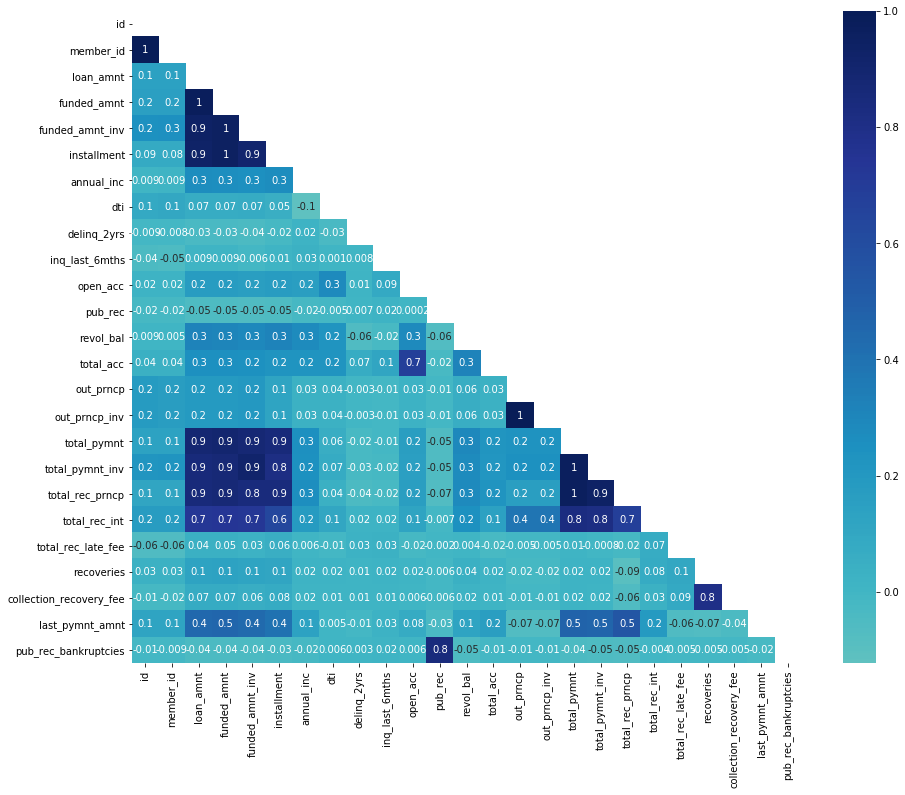

In [245]:
corr = dfCust.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(15, 12))

sns.heatmap(corr,  cmap='YlGnBu', mask = mask, center=0, linewidths= 0.1, annot=True, fmt='.1g')

plt.show()

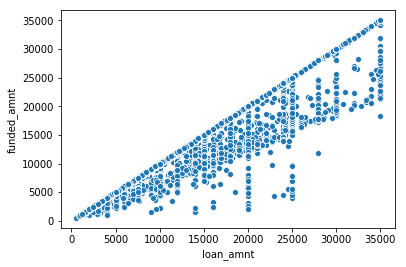

In [97]:
sns.scatterplot(x='loan_amnt', y='funded_amnt', data=dfCust)
plt.show()

In [100]:
dfCust.to_csv('Cust.csv', index=False)

In [102]:
dfCust.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade                 emp_title emp_length  \
0   10.65%       162.87     B        B2                       NaN  10+ years   
1   15.27%        59.83     C        C4                     Ryder   < 1 year   
2   15.96%        84.33     C        C5                       NaN  10+ years   
3   13.49%       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4   12.69%        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-11   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-11  Charged Off   
2           RENT     12252.0        Not Verified  Dec-11   Fully Paid   
3           RENT     49200.0     Source Verified  Dec-11   Fully Paid   
4           RENT     80000.0     Source Verified  Dec-11      Current   

          purpose                 title zip_code addr_state    dti  \
0     credit_card              Computer    860xx         AZ  27.65   
1             car                  bike    309xx         GA   1.00   
2  small_business  real estate business    606xx         IL   8.72   
3           other              personel    917xx         CA  20.00   
4           other              Personal    972xx         OR  17.94   

   delinq_2yrs earliest_cr_line  inq_last_6mths  open_acc  pub_rec  revol_bal  \
0            0           Jan-85               1         3        0      13648   
1            0           Apr-99               5         3        0       1687   
2            0           Nov-01               2         2        0       2956   
3            0           Feb-96               1        10        0       5598   
4            0           Jan-96               0        15        0      27783   

  revol_util  total_acc  out_prncp  out_prncp_inv   total_pymnt  \
0     83.70%          9       0.00           0.00   5863.155187   
1      9.40%          4       0.00           0.00   1008.710000   
2     98.50%         10       0.00           0.00   3005.666844   
3        21%         37       0.00           0.00  12231.890000   
4     53.90%         38     524.06         524.06   3513.330000   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0          5833.84          5000.00         863.16                0.00   
1          1008.71           456.46         435.17                0.00   
2          3005.67          2400.00         605.67                0.00   
3         12231.89         10000.00        2214.92               16.97   
4          3513.33          2475.94        1037.39                0.00   

   recoveries  collection_recovery_fee last_pymnt_d  last_pymnt_amnt  \
0        0.00                     0.00       Jan-15           171.62   
1      117.08                     1.11       Apr-13           119.66   
2        0.00                     0.00       Jun-14           649.91   
3        0.00                     0.00       Jan-15           357.48   
4        0.00                     0.00       May-16            67.79   

  last_credit_pull_d  pub_rec_bankruptcies  
0             May-16                   0.0  
1             Sep-13                   0.0  
2             May-16                   0.0  
3             Apr-16                   0.0  
4             May-16                   0.0

In [124]:
sns.catplot(data=dfCust, x ='inq_last_6mths', kind='count')
plt.show()

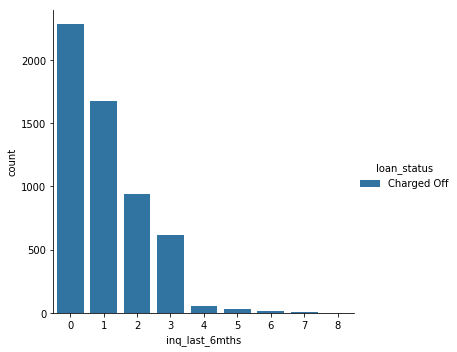

In [192]:
sns.catplot(data=dfCust[dfCust['loan_status'] == 'Charged Off'], x='inq_last_6mths', kind='count', hue='loan_status')
plt.show()

In [191]:
#dfCust[['inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv']].apply(pd.Series.value_counts)
dfCust[['inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv']].head()

inq_last_6mths  open_acc  pub_rec  revol_bal revol_util  total_acc  \
0               1         3        0      13648     83.70%          9   
1               5         3        0       1687      9.40%          4   
2               2         2        0       2956     98.50%         10   
3               1        10        0       5598        21%         37   
4               0        15        0      27783     53.90%         38   

   out_prncp  out_prncp_inv   total_pymnt  total_pymnt_inv  
0       0.00           0.00   5863.155187          5833.84  
1       0.00           0.00   1008.710000          1008.71  
2       0.00           0.00   3005.666844          3005.67  
3       0.00           0.00  12231.890000         12231.89  
4     524.06         524.06   3513.330000          3513.33

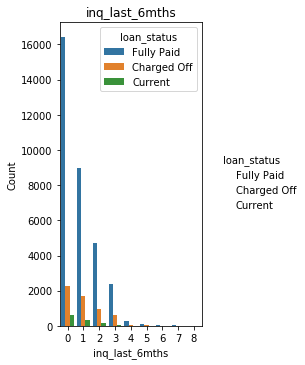

In [165]:
#plt.figure(figsize=(12,4), )

ax2 = plt.subplot(1,2,1)
sns.catplot(data=dfCust, x='open_acc', kind='count', hue='loan_status', ax=ax2)
ax2.set_ylabel('Count')
ax2.set_title('Open Account')

ax1 = plt.subplot(1,2,2)
sns.catplot(data=dfCust, x='inq_last_6mths', kind='count', hue='loan_status', ax=ax1)
ax1.set_ylabel('Count')
ax1.set_title('inq_last_6mths')

plt.show()

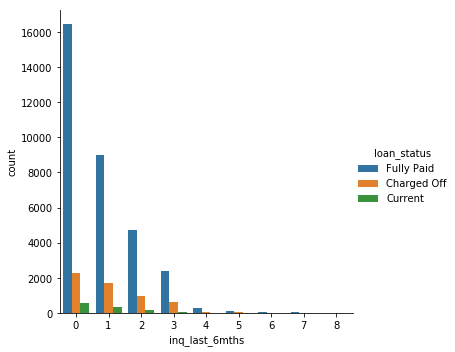

In [167]:
sns.catplot(data=dfCust, x='inq_last_6mths', kind='count', hue='loan_status')
sns.catplot(data=dfCust, x='pub_rec', kind='count', hue='loan_status')
plt.show()

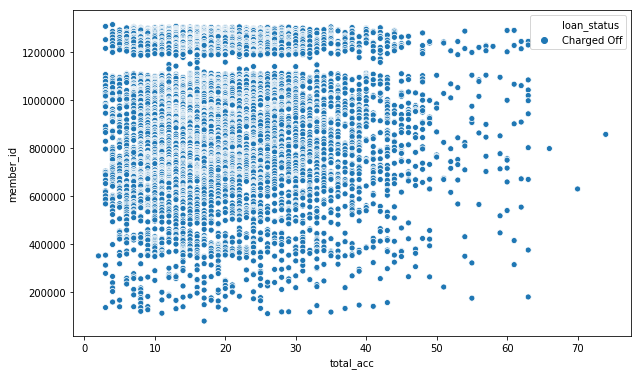

In [181]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=dfCust[dfCust['loan_status'] == 'Charged Off'], x='total_acc', y='member_id', hue='loan_status')
plt.show()

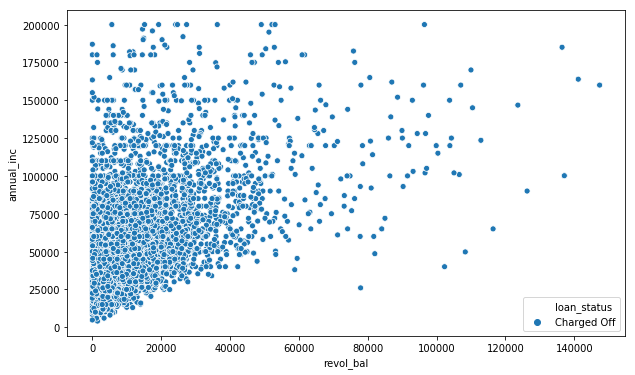

In [202]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=dfCust[(dfCust['annual_inc'] <= 200000) & (dfCust['loan_status'] <= 'Charged Off')], x='revol_bal', y='annual_inc', hue='loan_status')
plt.show()

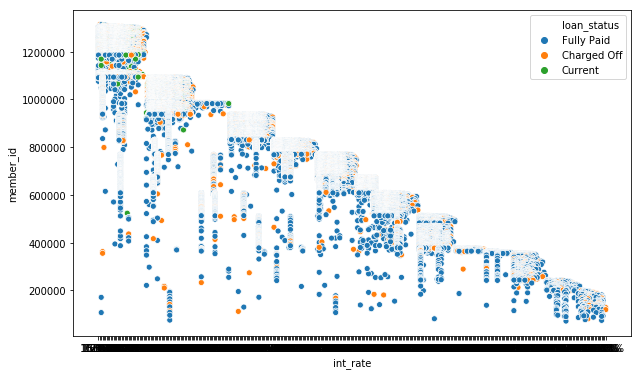

In [188]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=dfCust, x='int_rate', y='member_id', hue='loan_status')
plt.show()

In [189]:
dfCust['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64